# 产生源信号与观察信号
[大图](ICA.html), [下载](origin_files/ICA.ipynb)

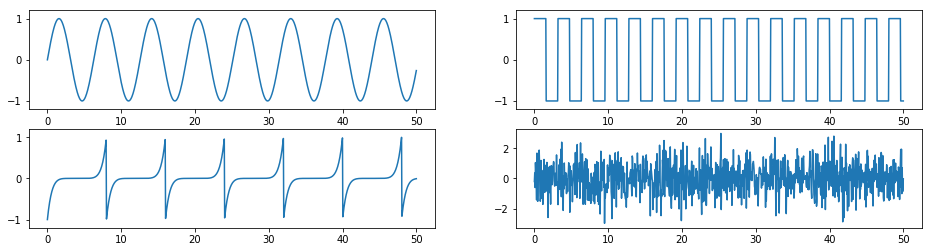

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 产生源信号数据，4路源信号
x = np.linspace(0, 50, 1000)
s1 = np.sin(x)
s2 = np.array([(-1)**(k // 32) for k in range(1000)])
s3 = np.power((x % 8 - 4) / 4., 7)
s4 = np.random.randn(1000)
source = np.vstack([s1, s2, s3, s4])

# 绘制图形
plt.figure(figsize=(16, 4))

plt.subplot(221)
plt.plot(x, s1)
plt.ylim(-1.2, 1.2)

plt.subplot(222)
plt.plot(x, s2)
plt.ylim(-1.2, 1.2)

plt.subplot(223)
plt.plot(x, s3)
plt.ylim(-1.2, 1.2)

plt.subplot(224)
plt.plot(x, s4)

plt.show()


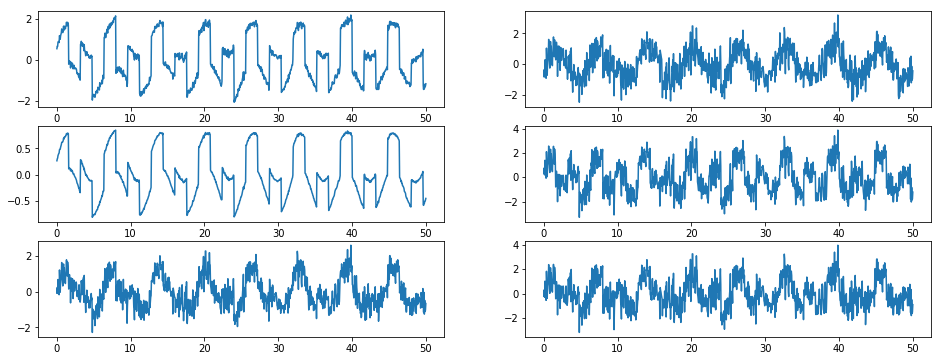

In [2]:
# 使用混合矩阵A混合各路数据，混合为6路
A = np.random.random(24).reshape(4, 6)
X = np.dot(source.T, A)

# 绘制混合信号数据
plt.figure(figsize=(16, 6))

for num in range(6):
    plt.subplot(321 + num).plot(x, X[:, num])

plt.show()

# 使用ICA进行独立成分分析

In [3]:
# 使用FastICA进行独立成分分析
from sklearn.decomposition import PCA, FastICA

ica = FastICA(fun='logcosh', n_components=4)
X_ica = ica.fit_transform(X)

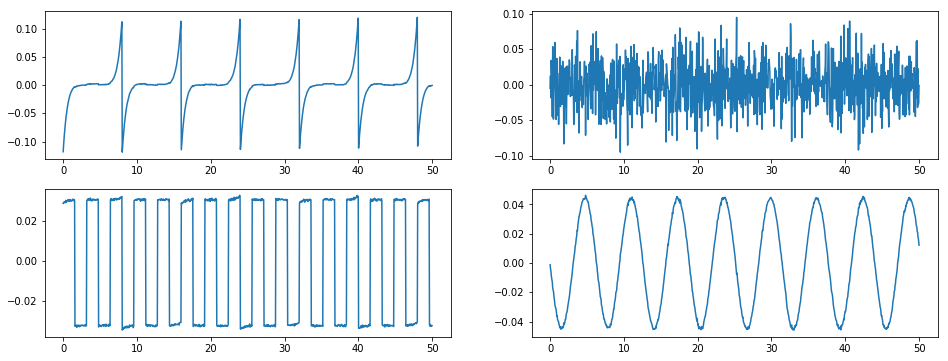

In [4]:
dim = X_ica.shape[1]
plt.figure(figsize=(16, 6))

for i in range(dim):
    plt.subplot(221 + i).plot(x, X_ica[:, i])

plt.show()

# 联合使用PCA和ICA
* FastICA可以使用PCA作数据预处理，也可以自己做处理以指定主成分个数（独立成分个数）

In [5]:
np.corrcoef(X.T)

array([[ 1.        ,  0.56328824,  0.97279497,  0.8945664 ,  0.80874244,
         0.80425793],
       [ 0.56328824,  1.        ,  0.62842398,  0.75456511,  0.93604398,
         0.89066997],
       [ 0.97279497,  0.62842398,  1.        ,  0.83908922,  0.85214312,
         0.78310163],
       [ 0.8945664 ,  0.75456511,  0.83908922,  1.        ,  0.89996205,
         0.96852595],
       [ 0.80874244,  0.93604398,  0.85214312,  0.89996205,  1.        ,
         0.95756665],
       [ 0.80425793,  0.89066997,  0.78310163,  0.96852595,  0.95756665,
         1.        ]])

In [6]:
# 使用PCA对混合信号进行降维
pca = PCA(n_components=6, whiten=True)
X_pca = pca.fit(X).transform(X)
pca.explained_variance_ratio_

array([  8.85622136e-01,   8.82811215e-02,   2.53150836e-02,
         7.81658779e-04,   5.87039921e-33,   7.66841041e-34])

In [7]:
pca = PCA(n_components=4, whiten=True)
X_pca = pca.fit(X).transform(X)

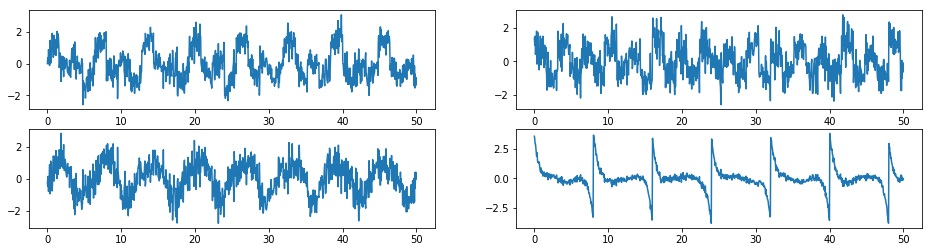

In [8]:
# 绘制PCA降维后的混合信号
plt.figure(figsize=(16, 4))
for i in range(dim):
    plt.subplot(221 + i).plot(x, X_pca[:, i])

plt.show()

In [9]:
# 对PCA降维后的混合信号进行ICA独立成分分解
pca_ica = FastICA(fun='exp', n_components=4)
X_pca_ica = ica.fit(X_pca).transform(X_pca)

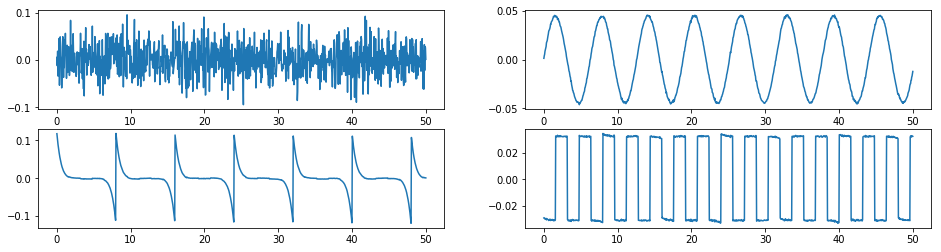

In [10]:
plt.figure(figsize=(16, 4))

for i in range(dim):
    plt.subplot(221 + i).plot(x, X_pca_ica[:, i])

plt.show()